In this notebook we implement analysis and logging. To help manually check, we can probably automatically find the at-risk frames. This will happen when 

1. Flies are close together (inversion).
2. If something weird happends during the identification. This will show up as a jump in the position.

Point 1) can be implemented after, but that will be super slow. We already calculate the distance matrix, so let's implement a logger. Point 2) we can do after we've run the analysis. Let's do point 2) first.

In [1]:
import cv2 as cv 
import numpy as np
import pandas as pd

from flytracker.utils import run_tracker_kmeanspython
import matplotlib.pyplot as plt 

%load_ext autoreload
%autoreload 2

In [4]:
%%time
dataset = run_tracker_kmeanspython(1000, n_flies=40)

CPU times: user 1min 24s, sys: 5.41 s, total: 1min 29s
Wall time: 13 s


In [5]:
df = pd.DataFrame(dataset, columns=['frame', 'ID', 'x', 'y'])

In [11]:
@pd.api.extensions.register_dataframe_accessor("groups")
class Groups:
    def __init__(self, pandas_obj):
        self._validate(pandas_obj)
        self._obj = pandas_obj
        
    @staticmethod
    def _validate(obj):
        for name in ['x', 'y']:
            if nams not in obj.columns:
                raise AttributeError("Must have x and y columns.")

    @property
    def coordinates(self):
        # return the geographic center point of this DataFrame
        return self._obj[['x', 'y']]
    
    @property
    def velocities(self):
        return self.obj[['v_x', 'v_y']]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: registration of accessor <class '__main__.Groups'> under name 'groups' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexistingattribute with the same name.
  """Entry point for launching an IPython kernel.


In [12]:
df.groups.coordinates

,x,y
0,983.375000,231.125000
1,430.674419,759.023256
2,979.416667,719.937500
3,331.420290,308.014493
4,762.833333,409.979167
...,...,...
39995,417.886364,151.409091
39996,969.235294,745.568627
39997,980.468085,695.191489
39998,272.911111,338.355556


In [ ]:
w

In [47]:
def outlier_detection(dataframe, outlier_distance=10):
    n_frames = int(dataframe['frame'].max() - dataframe['frame'].min() + 1)
    n_flies = int(df['ID'].unique().size)
    dataset_3D = dataframe.coordinates.to_numpy().reshape(n_frames, n_flies, -1)
    dists = np.sqrt(np.sum(np.diff(dataset_3D, axis=0)**2, axis=2))
    
    outliers = np.stack(np.where(dists > outlier_distance), axis=1)
    return outliers

In [48]:
%%time
outlier_detection(df)

CPU times: user 5.18 ms, sys: 970 µs, total: 6.15 ms
Wall time: 5.08 ms


array([[253,  26],
       [377,  33],
       [437,  26],
       [520,  26]])

In [49]:
frame = 720
cap = cv.VideoCapture('../../data/movies/4arenas_QR.mp4') #video_name is the video being called
cap.set(1, frame); # Where frame_no is the frame you want
ret, image = cap.read() # Read the frame

In [76]:
df.query(f'frame == {frame}')

,frame,ID,x,y
28800,720.0,0.0,990.659574,730.638298
28801,720.0,1.0,552.207547,632.716981
28802,720.0,2.0,466.857143,861.816327
28803,720.0,3.0,507.076923,839.884615
28804,720.0,4.0,404.086420,757.024691
28805,720.0,5.0,375.877551,575.469388
28806,720.0,6.0,981.367347,775.795918
28807,720.0,7.0,370.541176,809.152941
28808,720.0,8.0,1001.543478,757.652174
28809,720.0,9.0,972.490196,732.352941


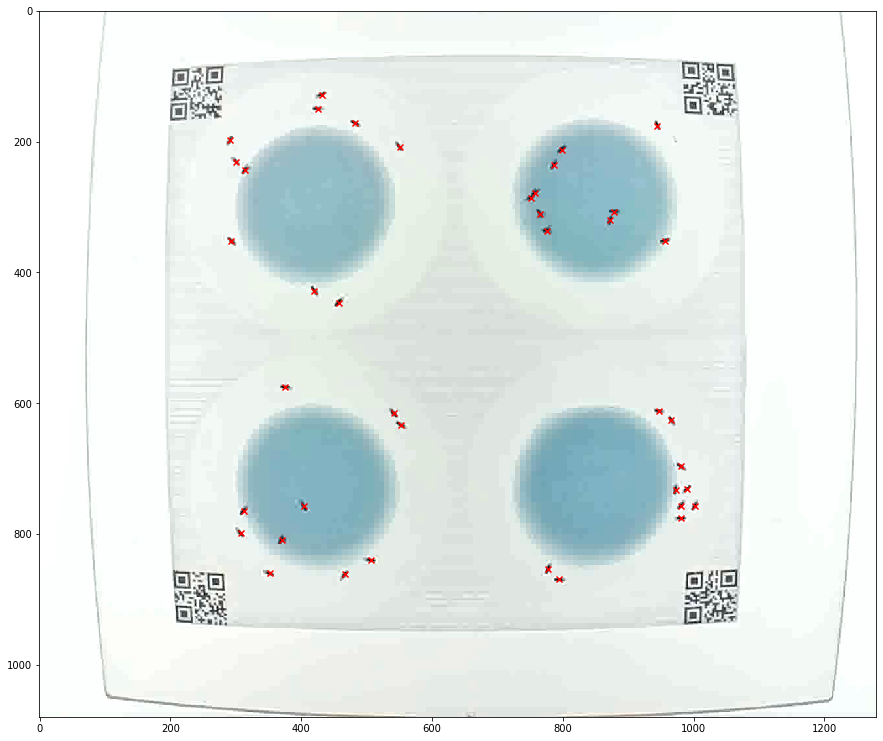

In [61]:
plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.scatter(df.query(f'frame == {frame}')['x'], df.query(f'frame == {frame}')['y'], marker='x', color='r')

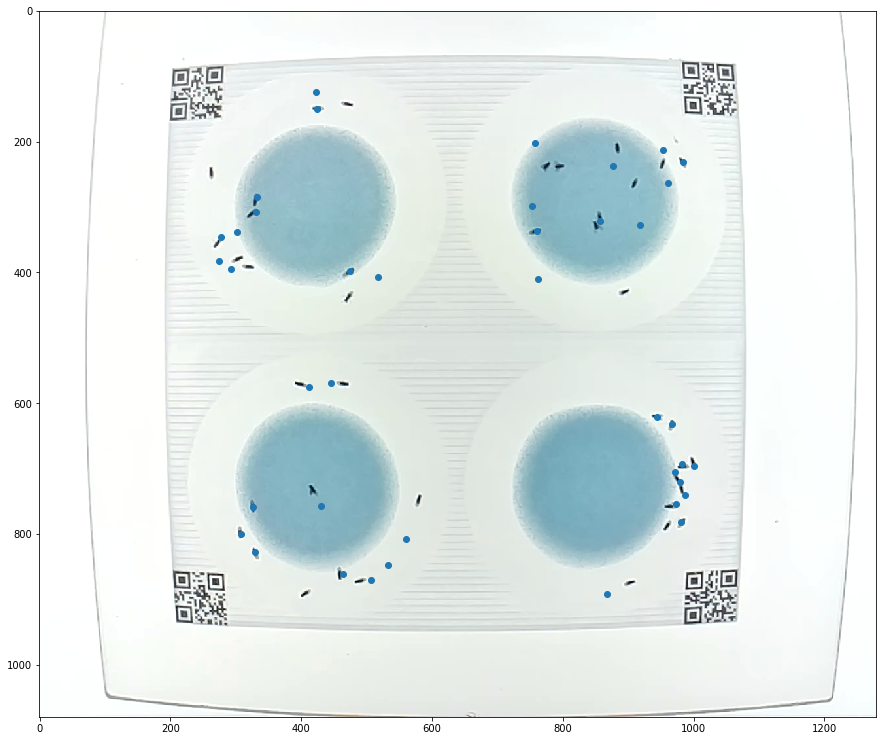

In [21]:
frame.

In [23]:
ret

False